**Tego Chang**

**Duke Master in Interdisciplinary Data Science**

# What G-league statistics are indicative to NBA success? {-}

I would like to explore this question from the point of view of the front office of the NBA teams. That is, what statistics a G-league player shall show so that I would say he does have potential and that I am willing to give him a ticket to the NBA to have a try?

Based on the above, we slightly transform the question into below:

**Among the G-league players who get two-way contracts, what statistics of them are the most different compared with that of the rest of the players in the league?**

In [9]:
import pandas as pd
import numpy as np

### Data Collection and Wrangling {-}

To answer the question of interest, we collect G-league data from the [G-league official website](https://stats.gleague.nba.com/players/advanced/?sort=GP&dir=-1&Season=2017-18&SeasonType=Regular%20Season). The statistics we consider in this question include **all traditional and advanced statistics** listed on the website, which is a totally of **$42$ variables** (features). As the number of players who get two-way contracts might be small in some seasons, we collected the data in **the last five seasons** in the league to have enough data points.

Note:

- Data wrangling is performed in another file, *G League Data Wrangling.ipynb*, for the sake of clarity in this report. 



- There are two csv files stored after data wrangling is processed, which are *restAll_5yrs.csv* and *twoWay_5yrs.csv*. They represent the statistics of players who don't get two-way contracts and who do correspondingly. 

In [10]:
df = pd.read_csv("Data/restAll_5yrs.csv")
df.head()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,24,1,0,1,39.6,34.0,10.0,16.0,62.5,2.0,...,0.0,5.4,5.9,5.6,4.5,68.8,79.9,21.2,117.67,16.6
1,21,32,17,15,38.2,32.0,11.0,24.0,45.9,2.8,...,11.4,1.8,14.3,8.2,8.5,51.8,57.9,33.1,102.48,15.7
2,21,2,1,1,41.3,29.5,8.0,19.0,42.1,3.5,...,3.4,3.9,20.5,12.3,13.8,51.3,60.2,29.6,97.14,12.6
3,24,1,0,1,36.4,29.0,11.0,22.0,50.0,6.0,...,7.4,0.0,17.1,7.7,3.7,63.6,61.0,27.5,112.14,12.5
4,32,24,13,11,37.2,28.2,8.8,19.8,44.5,4.1,...,14.8,1.1,8.6,4.6,8.4,55.0,60.9,26.3,106.84,13.2


In [11]:
# a look of all the variables we collected
df.columns

Index(['AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'OFFRTG', 'DEFRTG', 'NETRTG',
       'AST%', 'AST/TO', 'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO',
       'EFG%', 'TS%', 'USG%', 'PACE', 'PIE'],
      dtype='object')

In [12]:
len(df)

2076

In [13]:
df_tw = pd.read_csv("Data/twoWay_5yrs.csv")
df_tw.head()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,23.0,12.0,8.0,4.0,25.2,10.3,3.1,9.9,31.1,1.3,...,18.1,1.8,16.0,8.6,12.1,37.8,45.0,22.2,104.40,6.3
1,23.0,26.0,12.0,14.0,36.9,22.1,8.5,17.4,48.6,2.3,...,20.6,3.4,14.4,8.9,9.6,55.1,57.6,23.7,104.84,13.3
2,23.0,34.0,23.0,11.0,35.6,20.7,7.3,16.3,44.6,3.1,...,22.5,1.8,12.2,7.1,12.8,54.2,57.8,22.1,110.38,12.4
3,24.0,34.0,18.0,16.0,34.5,13.9,5.1,13.0,39.7,1.8,...,16.7,2.9,14.2,8.3,12.3,46.5,49.4,19.1,101.30,8.4
4,23.0,47.0,25.0,22.0,33.5,13.2,4.9,11.2,43.8,1.8,...,34.1,1.7,11.9,6.8,12.0,51.6,54.3,18.3,104.34,11.3


In [14]:
len(df_tw)

77

### Data Preprocessing {-}

As the scale of each variable we collected is not the same, we decide to normalize the dataset so that we could more likely to have an accurate analysis of the critical indicators. 

In [15]:
from sklearn import preprocessing

minmax = preprocessing.MinMaxScaler()
X_minmax = minmax.fit_transform(df)
X_tw_minmax = minmax.fit_transform(df_tw)

### Two-Sample T-test {-}

Our approach for this question is to **conduct Two-Sample T-Test for all the variables** between the two groups, the players who get two-way contracts in the past five season and the players who don't. The null hypothesis is the targeting variable (feature) is the same between the two group, while the alternative is the opposite. On the variables that we successfully reject the null, we would infer that variable could be a critical indicator for deciding if a G-league player could win the ticket to the NBA from the front office's point of view. 

In [16]:
from scipy.stats import ttest_ind

features = []

for idx, feature in enumerate(df.columns):
    ttest_stat, ttest_pval = ttest_ind(X_minmax[:,idx], X_tw_minmax[:,idx])
    features.append([feature, ttest_pval, abs(ttest_stat)])
    
df_features = pd.DataFrame(features, columns = ['Indicator', 'P-Value', 'Test Stat'])

In [17]:
df_features = df_features[df_features['P-Value'] <= 0.05].sort_values(by = "Test Stat", ascending=False)

In [18]:
# for f_name in df_features.Indicator.unique():
df_features['Mean Two-way'] = np.asanyarray(df_tw[df_features.Indicator].agg(np.mean))
df_features["Mean Rest G-league"] = np.asanyarray(df[df_features.Indicator].agg(np.mean))
df_features['Mean Two-way'] = np.asanyarray(np.round(df_tw[df_features.Indicator].agg(np.mean), 2))
df_features["Mean Rest G-league"] = np.asanyarray(np.round(df[df_features.Indicator].agg(np.mean), 2))
df_features.iloc[:10,:]

,Indicator,P-Value,Test Stat,Mean Two-way,Mean Rest G-league
41,PIE,0.000000e+00,82.147025,11.20,8.96
36,TO RATIO,0.000000e+00,57.217357,11.54,12.08
40,PACE,4.061286e-271,40.908617,104.93,104.63
32,AST RATIO,2.494961e-140,27.206505,17.00,16.01
12,FTM,1.562196e-128,25.849351,1.73,1.36
30,AST%,1.681578e-104,22.957294,17.72,13.60
10,3PA,2.513406e-94,21.666703,5.53,3.24
31,AST/TO,2.754121e-92,21.402150,1.62,1.42
13,FTA,2.070054e-56,16.299688,2.29,1.83
11,3P%,1.759531e-55,16.152209,30.72,29.17


### Summary {-}

In the above result, we listed the top ten indicators that we think the G-league players shall have in order to enter NBA. *PIE*, which is an improvement metric to *EFF*, is basically a summary metric that gives an indication of the performance of a player. It has a pretty high correlation with team's winning percetage. Generally, a player that achieves more than 10 in this metric is considered to be better than the average player, and the G-league players who get two-way contracts have an average of 11.20 in this case, which might explain why they could earn the contracts.

In the rest of the nine metrics, we separate them into three categories. In each category, we would try to infer which characteristic players might have demonstrated so that they get the two-way contracts. 

- Category 1: *FTA, FTM, AST RATIO, AST%*
    - The four metrics could be indicators that the front office is expecting someone who can make plays. The ideal players might be able to penetrate or attack the paint so that they could either go to the free-throw line or draw defensive attention to assist their teammates in scoring. 
    
    
- Category 2: *AST/TO, TO RATIO*
    - The two metrics might raise a focus on how the players could control their turnovers while making plays. I would consider this category more related to your fundamental ball-handling skills and the basketball IQ on how you read the game.
    
    
- Category 3: *3PA, 3P%*
    - The two metrics are the most intuitive. In the current trend led by the concept of Money Ball and Stephen Curry, NBA teams have been more emphasizing three-pointers than ever. That is the skill almost considered mandatory for entering NBA. 

# How would you go about designing a model to predict if a player will get injured and severity of injury? What data would you utilize and what techniques would you apply? {-}

### Related Dataset and Metrics {-}

We will investigate the question first with the domain knowledge of basketball. Factors that result in injury could be many, but **fatigue** and **physical wear and tear** might be considered as the mainly two reasons of all. The metrics, or say features when we try to construct our predictive model, for these two factors could include: 

- Back-to-back games in a season, average minutes played in a season, and total games/minutes played in a season (dataset can be acquired from [NBA](https://www.nba.com/stats/) or [Basketball Reference](https://www.basketball-reference.com/leagues/NBA_2022_games.html)).
- Past injury history (dataset can be acquired from [Pro Sports Transactions](https://www.prosportstransactions.com/basketball/Search/SearchResults.php?Player=&Team=&BeginDate=&EndDate=&InjuriesChkBx=yes&Submit=Search&start=0)).
- Average distance run or offensive fouls draw in a game.





### Question Decomposition {-}

The question of interest can be separated into two: 

1. How to predict whether a player will get injured?
2. If a player has a high risk to get injured, what will the severity be?

### Attack Question 1 {-}

The first question above can be treated as a binary classification problem. We could consider applying supervised machine learning or statistical models such as Logistic Regression, Decision Trees, and more models. However, the key point to be highlighted is that the model applied needs to be **interpretable** as our **target users here are coaches, players, or people having professional basketball domain knowledge and not treated as a data science expertise**. Our first goal is to provide a draft insight based on our model and have our target users understand what and why we do so. Then, here comes the main dish - interdisciplinary collaboration to enhance the prediction. 

There are many forms of collaboration so that we, data scientists, could acquire more features to put into our model. It could be **through a survey to our target users above or a hosted meeting to bring up discussions**. We expect more inputs from such, e.g., from the sports science point of view, doctors might propose that whether **players perform protection movement**, like rolling on the ground, for sudden landing could be a key on whether the player will get injured. In this case, we collect or even manually record this data and put it into our model for further enhancement. Further, **shooting posture** could also be a factor as we tend to think that compared with the hop in one motion, 1-2 step will put more pressure on one knee first, which is considered more likely to hurt the first knee. During the interdisciplinary collaboration with coaches, players, or 3rd parties, **our target is to collect as many features as possible** after we have them realize what the first model above is about. 

Then here comes the final step of how we attack the question - we put all of the features collected as inputs and put them into our model. Compared with the draft model in the first section, **our model of choice here doesn't have to be interpretable** in order to achieve the best prediction accuracy. It could be an SVM, XGBoosting, or even Neutral Network through deep learning. The key thing is that we already input the model with all of the features, or say factors, the experts (the coaches, players, or doctors) think could result in injuries, and from the data science point of view, the possibility of **such a flexible model to provide us a better prediction** is promising.

### Attack Question 2 {-}

The question of how to predict the severity of a potential injury of a player can be treated as a multi-level classification problem. There are two solutions we would like to propose to answer it. Some idea in the first solution is similar to what we have mentioned in the solution for question 1, while the second solution is a completely different method. Both of which apply machine learning or statistical modeling. 

##### Solution 1 {-}

In the first solution, first we will need to define the severity of an injury. The definition can be based on the team's need, for example:

- Class 0: out for days ~ 2 weeks (miss few games)
- Class 1: out for weeks ~ 2 months (miss parts of the regular season)
- Class 2: out for 3 ~ 6 months (likely miss the entire regular season)
- Class 3: out for the entire season
- Class 4: out for more than one season

Second, based on our definition, we separate players into groups, e.g., five for the above example, **based on the highest severity in their injury history**. For example, a player with three class 0 and one class 3 injuries will be placed into the fourth group above. The similarity compared with the process for question 1 is that we will conduct collaborative discussions with basketball domain knowledge expertise such as coaches or (retired) players for **exploring the characteristics (features) of the players in each of the groups**. For example, based on the players in each group, we might hypothesize that players like Ja Morant who penetrates more and jumps higher might have a higher chance of getting class 1 sprained ankle. In this case, the features we considered valuable for this question are **the frequency of penetrating** and **the height a player can jump**, which is the data we need to collect to proceed with the following. 

Lastly, according to the features and the corresponding data collected, we train a supervised machine learning or statistical model to forecast the severity of injury that the high-risk player might have. 

##### Solution 2 {-}

The second solution is to **build a recommendation system** to predict 1) **Which part** will the injury be, e.g., knee, angle, twist, and more parts of the body. 2) **At which level of severity** will the injury be, e.g., level 0 to level 4. The total options of the output will be a combination of body parts and severity levels. 

There are generally two approaches for building a recommendation system, content-based or collaborative filtering. Content-based filtering might try to locate the characteristics of every output option, which **might not make sense**. For example, how can we determine the characteristic of a class 3 knee injury?

However, collaborative filtering could be a complete different story. In this approach, we can either conduct one of the below two methods:

- Player-based filtering: based on **players with similar injury** to predict what injury might happen in the following. 
    - In Fig.1, player C might have risks to have *Calf Class 2* and *Foot Class 1* based on the similiar injury history of player A. 

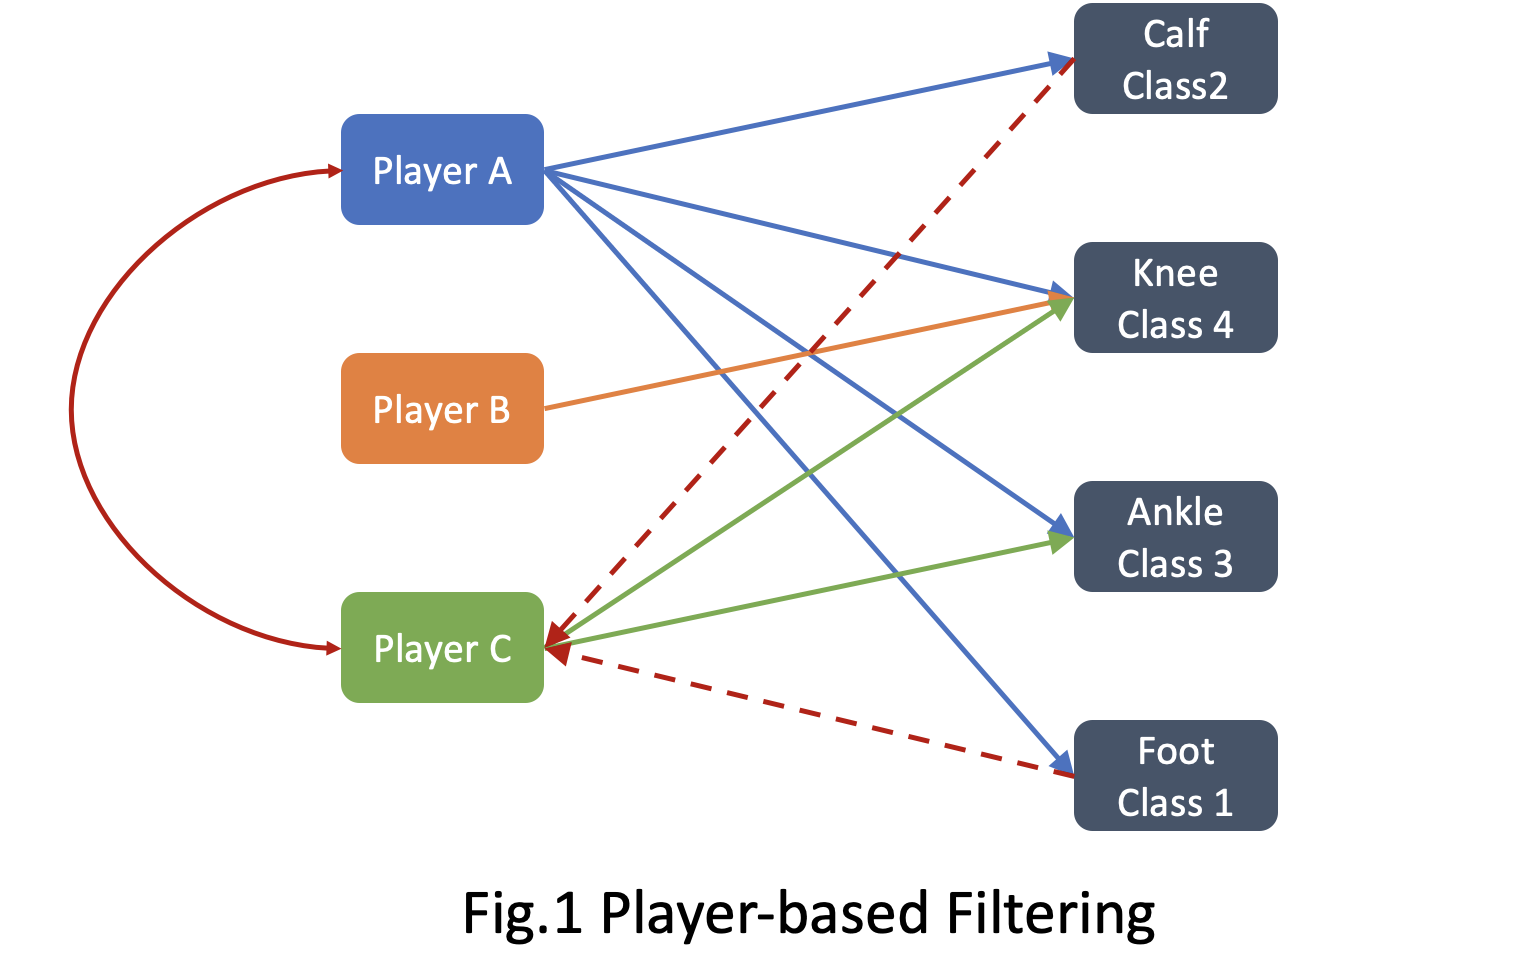

In [21]:
from IPython.display import Image
Image(filename='fig1.png', width = 600, height = 600) 

- Injury-based filtering: based on the **correlations among all injury options** to predict what injury might likely occur. 
    - In Fig.2, *Calf Class 2* and *Ankle Class 3* have a high chance of occurring together among players. When player C already has one of it, he might have a higher chance of suffering the other, too.

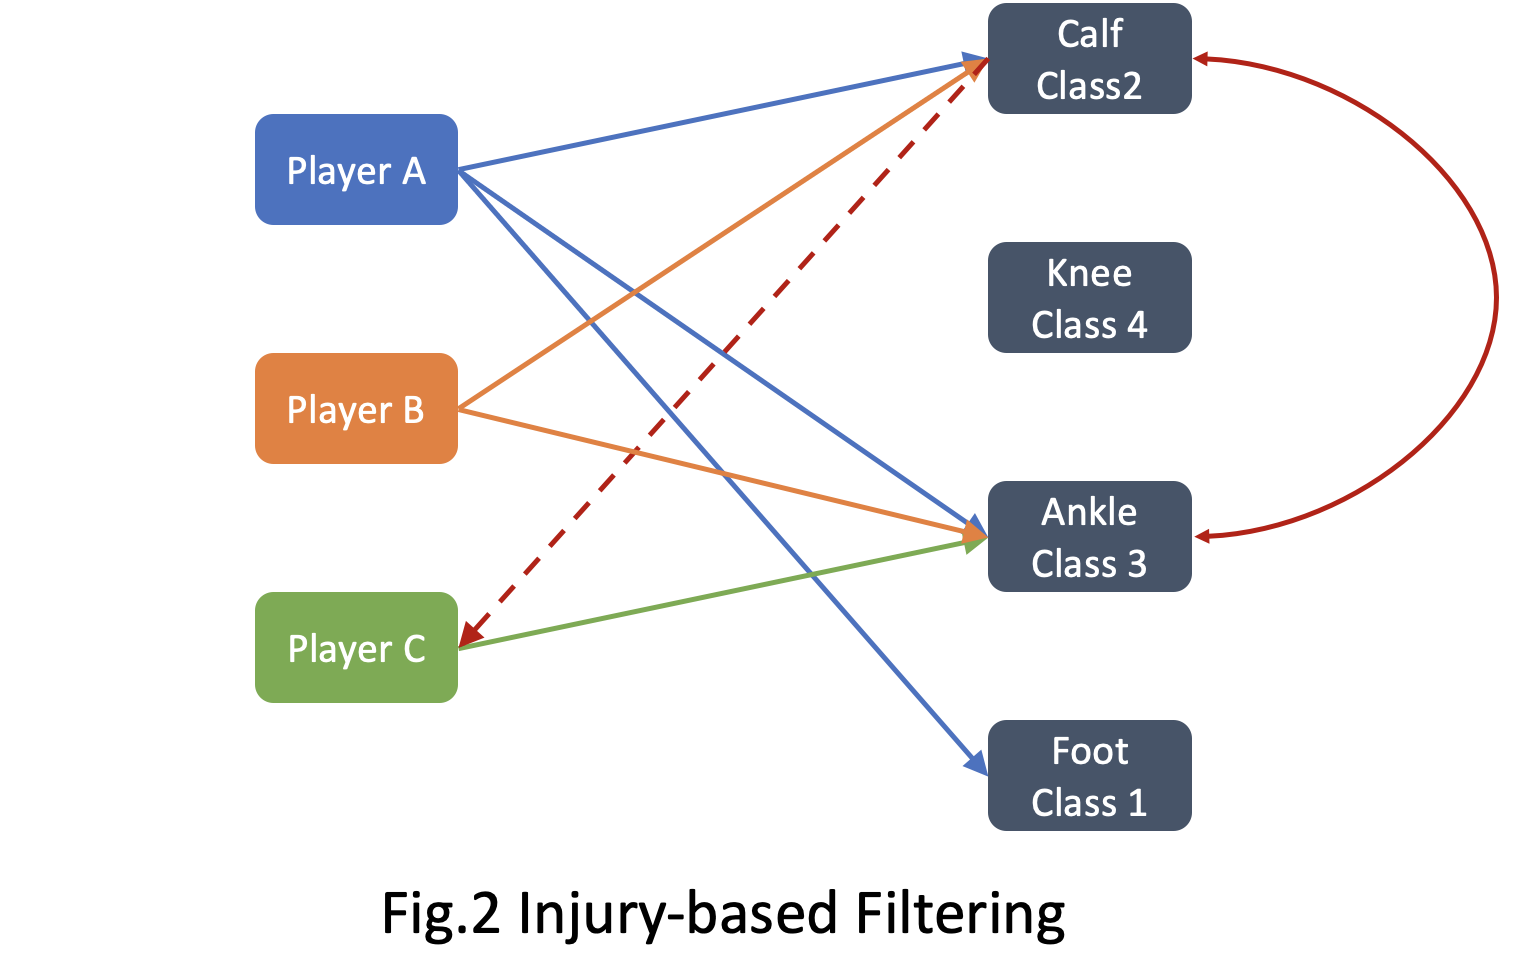

In [23]:
Image(filename='fig2.png', width = 600, height = 600) 

### Summary {-}

On answering the question, we have decomposed the question into two small ones and provided data science solutions for each one. How predictive our proposed model could largely depend on **how solid we conduct the interdisciplinary collaboration among experts from different fields**. The deeper the discussions dive into, the more meaningful features we might collect as inputs for our model. After all, I always believe that basketball analytics is not just conducted by a group of data scientists who know how basketball is played, but a collaboration between data scientists and the people playing, coaching, involving professionally in the industry. 